귀무가설이 참이다라고 하고 
p value값이0.05보다 크다면 귀무가설이 참이다.
귀무가설 거짓, 귀무가설 기각, 대립가설 채택

# 필요 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#멧플롯 한글화
mpl.rc('font',family='D2coding') ## family에 원하는 코드(D2코딩)
mpl.rc('font',family='Malgun Gothic') ## (맑은 고딕)

# Matplotlib 한글화와 음수처리

# wine data set loading

In [3]:
red = pd.read_csv('C:/k_digital/data/winequality-red.csv', sep=';')
white = pd.read_csv('C:/k_digital/data/winequality-white.csv', sep=';')

In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white.shape

(4898, 12)

In [6]:
red.shape

(1599, 12)

In [7]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
red.insert(0, column = 'type', value = 'red')
red.shape

(1599, 13)

In [10]:
red.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
white.insert(0, column = 'type', value = 'white')
white.shape

(4898, 13)

In [12]:
##concat이용하여 데이트 프레임을 합치는 작업
wine = pd.concat([red, white])
wine.shape

(6497, 13)

In [13]:
wine.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,white,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [14]:
#이렇게 합친 dataset 걸 저장
wine.to_csv('C:/k_digital/data/wine.csv', index = False)

## feature분석
- fixed acidity : 고정 산도
- volatile acidity : 휘발성 산도
- citric acid : 시트르산
- residual sugar : 잔류 당분
- chlorides : 염화물
- free sulfur dioxide : 자유 이산화황
- total sulfur dioxide : 총 이산화황
- density : 밀도
- pH
- sulphates : 황산염
- alcohol
- quality : 0 ~ 10(높을 수록 좋은 품질)

# 데이터 탐색(EDA)

In [15]:
wine.info() #데이터의 정보와 구조 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [16]:
wine.columns #글 사이에 공백이 있으면 안될 수 있으니 _로 대체하자

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [17]:
wine.columns = wine.columns.str.replace(' ', '_')
wine.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [18]:
#describe : 기술통계량
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [19]:
#int값으로 되어있는게 와인의 품질이었지?
#와인의 품질 등급 확인
wine.quality.unique() #중복확인

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [20]:
#와인의 품질별 개수
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [21]:
wine.quality.nunique()

7

In [22]:
wine.groupby('type')['quality'].describe() #기초통계량을 알고싶다.

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [23]:
wine.groupby('type')['quality'].agg(['mean', 'std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


# t-검정(차이검정)
- 정규분포 인것이 저네조건

In [24]:
#t-검정
from scipy import stats

#회귀분석 #glm회귀분석을 할 함수
from statsmodels.formula.api import ols, glm

In [25]:
red_wine_quality = wine.loc[wine.type == 'red', 'quality']
white_wine_quality = wine.loc[wine.type == 'white', 'quality']

In [26]:
#독립일때 t검증을 해보자
#두 분산이 다를 거 같기에(등분산이 아니기에) equal_var = False
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var=False)

#p-value값이 0.005보다 작으니 차이가 있다는 것이 맞다!

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [27]:
wine.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [28]:
#포뮬러식을 만들게, 알아들었어?
#포뮬러식이란? 종속변수~독립변수
formuls = "quality ~ fixed_acidity + volatile_acidity + citric_acid +\
residual_sugar + chlorides + free_sulfur_dioxide +\
total_sulfur_dioxide + density + pH + sulphates + alcohol"

# OLS: Ordinary Least Squares 모델을 사용한다.
# 학습을 시킨다~fit!
result = ols(formuls, data = wine).fit()

In [29]:
result.summary() #선형회귀의 통계값

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:24:33   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
formuls = "quality ~ fixed_acidity + volatile_acidity  +\
residual_sugar + free_sulfur_dioxide +\
total_sulfur_dioxide + density + pH + sulphates + alcohol"

result1 = ols(formuls, data = wine).fit()

In [31]:
#요약보고서 출력
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     296.7
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:24:47   Log-Likelihood:                -7217.8
No. Observations:                6497   AIC:                         1.446e+04
Df Residuals:                    6487   BIC:                         1.452e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               60.0409     11.645      5.156      0.000      37.212      82.870
fixed_acidity            0.0662      0.015      4.412      0.000       0.037       0.096
volatile_acidity        -1.3043      0.071    -18.445      0.000      -1.443      -1.166
residual_sugar           0.0453      0.005      9.024      0.000       0.035       0.055
free_sulfur_dioxide      0.0059      0.001      7.911      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -9.217      0.000      -0.003      -0.002
density                -59.4185     11.873     -5.004      0.000     -82.694     -36.143
pH                       0.4782      0.088      5.411      0.000       0.305       0.651
sulphates                0.7378      0.075      9.903      0.000       0.592       0.884
alcohol                  0.2647      0.017     15.886      0.000       0.232       0.297
==============================================================================
Omnibus:                      144.178   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.085
Skew:                          -0.004   Prob(JB):                     2.56e-71
Kurtosis:                       4.096   Cond. No.                     2.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#예측에 사용할 샘플 데이터 생성#difference차집합
sample1 = wine[wine.columns.difference(['quality', 'type'])]
sample1 = sample1[:5][:]
sample1

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [33]:
#예측하기
#quality등급
sample_predic = result.predict(sample1)
sample_predic

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [34]:
wine[:5] #이걸 왜....?놓쳤다ㅠㅠ

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
#예측에 사용할 샘플데이터 생성
data = {
    'fixed_acidity':[8.5, 8.1],
    'volatile_acidity':[0.8, 0.5],
    'citric_acid':[0.3, 0.4],
    'residual_sugar':[6.1, 5.8],
    'chlorides':[0.055, 0.04],
    'free_sulfur_dioxide':[30.0, 31.0],
    'total_sulfur_dioxide':[98.0, 99],
    'density':[0.996, 0.91],
    'pH':[3.25, 3.01],
    'sulphates':[0.4, 0.35],
    'alcohol':[9.0, 0.88],
}

sample2 = pd.DataFrame(data, columns = sample1.columns)
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [36]:
sample2_predict = result.predict(sample2)
sample2_predict

0    4.809094
1    7.582129
dtype: float64

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


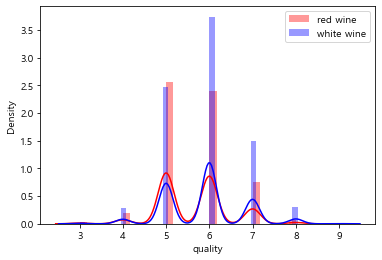

In [37]:
import seaborn as sns
sns.distplot(red_wine_quality, kde=True, color='red', label='red wine')
sns.distplot(white_wine_quality, kde=True, color='blue', label='white wine')
plt.legend()
plt.show()

# 한 화면에 여러개의 그래프를 그리는 방법

- 캔버스 :figure()
- 화면분할 : subplot(rows행의 수, cols열의 수, idx위치)

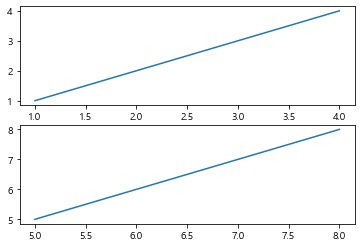

In [39]:
plt.figure() #figsize 피그의 크기
#분할해서 담을 거야
#2행 1열, 첫번째 그래프
plt.subplot(2, 1, 1) #위치 지정했어! #2행 1열
#여기다가 플로팅을 할거야
plt.plot([1, 2, 3, 4,], [1, 2, 3, 4])
#두번째는 2행1열 두번째 그래프
plt.subplot(2, 1, 2) #2행1열의 두번재 위치의~라는 뜻!
plt.plot([5, 6, 7, 8], [5, 6, 7, 8])
plt.show()

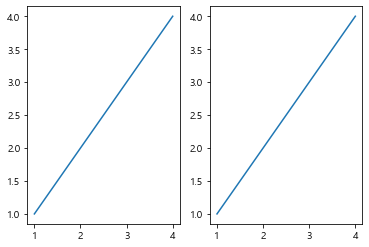

In [40]:
plt.figure()
#1행 1열, 첫번재 그림
#하나의 행에 두개의 그림이 오게 할 것이다
#그것의 첫번째 칸이라는 뜻 그렇다면subplt을 2행에 1열로 만들거야
plt.subplot(1, 2, 1)
plt.plot([1, 2, 3, 4,], [1, 2, 3, 4])

#1행2열, 두번째 그림
plt.subplot(1, 2, 2)
plt.plot([1, 2, 3, 4,], [1, 2, 3, 4])

plt.show()

In [41]:
#따로따로 하지 않고 축값만 불러올 수 있고 그것으로 위치 조절 가능
#도화지의 크기figsize #도화지 객체를 fig란 변수에 담아!
fig = plt.figure(figsize=(8, 13))
#화면 분할은 subplot을 통해서 따로해

<Figure size 576x936 with 0 Axes>

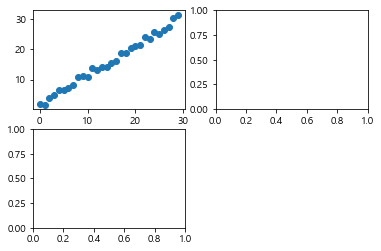

In [42]:
fig = plt.figure() #도화지를 분할 하겠다~
ax1 = fig.add_subplot(2, 2, 1)#추가하겠다. 2행2열짜리 첫번째 자리
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
# ax4 = fig.add_subplot(2, 2, 4) 안해도 되는가?

ax1.scatter(np.arange(30),np.arange(30)+3*np.random.rand(30))
plt.show() #안넣으면 그냥 세칸만 되는 군

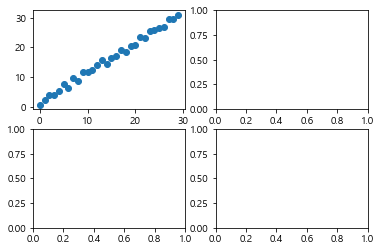

In [43]:
fig = plt.figure() #도화지를 분할 하겠다~
ax1 = fig.add_subplot(2, 2, 1)#추가하겠다. 2행2열짜리 첫번째 자리
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4) 

ax1.scatter(np.arange(30),np.arange(30)+3*np.random.rand(30))
plt.show()